# Project: Decision Tree Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

Importing the Iris dataset

In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [5]:
iris_data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Knowing missing values

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

no missing values

# Visualising the sepal and petal dimensions

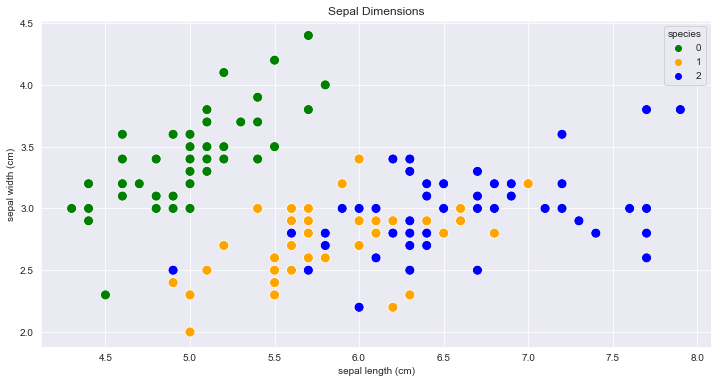

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

The plt gives information the species "0" has small sepal length and large sepal width and where species "2" has large sepal length and small sepal width. In some cases it is very difficult is classify species "1" and species "2" they almost have same sepal dimentions. Here it is easy to seperate species "0" from the other species with linear boundary, but it is not possible to seperate species "1" and "2" with linear boundary and hence requires complex boundary for seperaton.

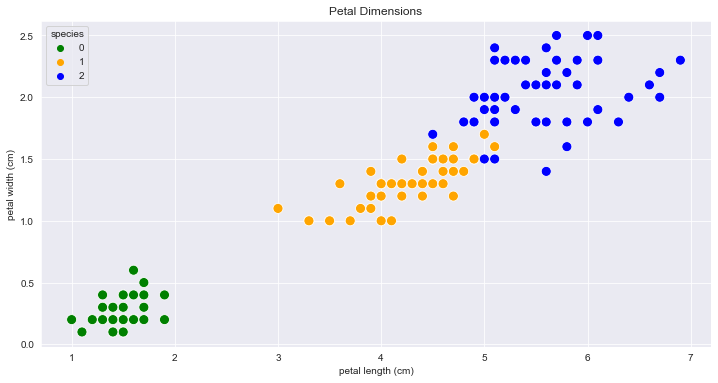

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

Here species "0" has small petal length and petal width while opposite holds true for species "2". It can be observed that there is linear relationship between petal length and petal width for all species.

# Splitting The Data into Training And Testing Dataset

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [10]:
train.shape, test.shape

((120, 5), (30, 5))

In [11]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [13]:
decisiontree = DecisionTreeClassifier(criterion='entropy')
decisiontree.fit(train_x,train_y)
pred = decisiontree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(pred, test_y))

The accuracy of Decision Tree is: 1.0


Test accuracy is 100%

# Install required libraries

In [14]:
!pip install pydotplus

# Let us visualize the Decision Tree to understand it better

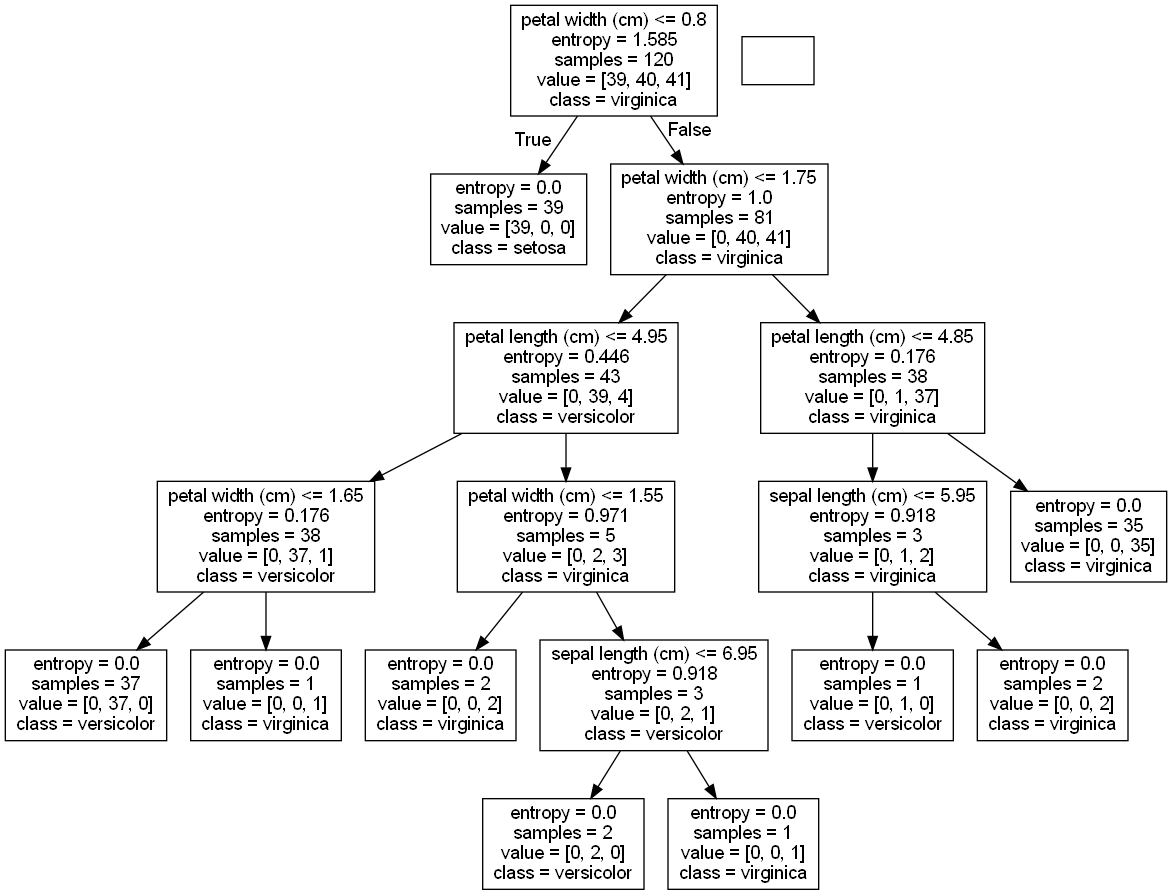

In [15]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree
dot_data = export_graphviz(decisiontree, out_file=None,
                          feature_names=iris_set.feature_names,
                          class_names=iris_set.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")
Image(graph.create_png())

# OR Tree implementation

In [16]:
or_df = pd.read_csv("OR Table.csv")
or_df

,x1,x2,y
0,True,True,True
1,False,True,True
2,True,False,True
3,False,False,False


In [17]:
train_x = or_df[['x1', 'x2']]
train_y = or_df.y 

In [18]:
train_y

0     True
1     True
2     True
3    False
Name: y, dtype: bool

In [19]:
OrTree = DecisionTreeClassifier(criterion='entropy')
OrTree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

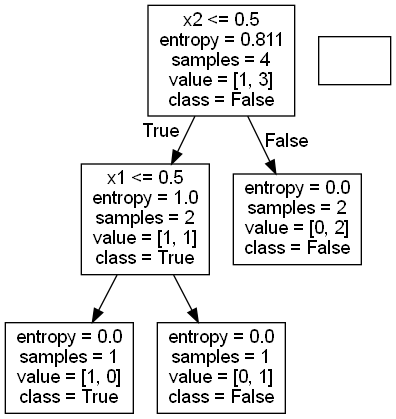

In [20]:
dot_data = export_graphviz(OrTree, out_file=None,
                          feature_names=train_x.columns,
                          class_names=['True', 'False'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("OR.pdf")
Image(graph.create_png())